# Los Angeles Crime Forecasting
#### -- David Bruce, Sidney Kung, Lhamu Tsering

<img src="visualizations/los-angeles-us-banner-dp-min.png">

## Overview

-- Enter text here

## Business Problem

-- Enter text here

## Data Understanding

-- Enter text here

In [3]:
# Importing Utility Functions
import numpy as np
import pandas as pd
import pickle
 
# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Importing Graphing libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium

# Importing Models

# Importing Model Evaluation

In [6]:
# Loading crime data csv file
df = pd.read_csv('data/extracted/crime-data-from-2010-to-present.csv')

In [7]:
# Preview of crime data
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals..."
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals..."
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals..."
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False..."
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals..."


In [9]:
df.shape

(1993259, 26)

The data has 1,993,259 observations over 26 variables. Each row is a record of information on crime that was reported, where it occurred, when it occurred, what the crime was, and information on the victims of the crime. 

The crime data information is daily crime data collected from January of 2010 to end of June 2019.

The variables are merely traits of the crime itself and has no bearing over the crime occurring itself.The trait variables can however be pieced and analyzed to study demographic characteristics and geographic characteristics of crimes reported in Los Angeles or LA.

## Data Cleaning

In [10]:
# checking for null values
df.isna().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description          0
MO Codes                   215872
Victim Age                      0
Victim Sex                 185960
Victim Descent             186006
Premise Code                   50
Premise Description           135
Weapon Used Code          1325641
Weapon Description        1325642
Status Code                     3
Status Description              0
Crime Code 1                    9
Crime Code 2              1863098
Crime Code 3              1990024
Crime Code 4              1993163
Address                         0
Cross Street              1659507
Location                        0
dtype: int64

In [11]:
# removing empty time stamp from Date Reported and Date Ocurred
df["Date Occurred"] = df["Date Occurred"].str.replace('T00:00:00', '')

# setting 'date occured' column as datetime object
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'], format= '%Y-%m-%d')

# Setting datetime index for time series data
df = df.set_index('Date Occurred').sort_index()

In [12]:
# Correcting negative ages in data to 0
df['Victim Age'] = np.where((df['Victim Age'] < 0), 0,df['Victim Age'])

# Filling missing value in victim sex and replacing based on data description
df['Victim Sex'].replace(to_replace=['H', '-', 'N'], value='X', inplace = True)
df['Victim Sex'].fillna('X', inplace= True)

# Filling missing value in victim descent and replacing based on data description 
df['Victim Descent'].fillna('X', inplace= True)
df['Victim Descent'].replace(to_replace=['-'], value='X', inplace = True)

#Filling missing premise code values with 0 and correcting code per description
df['Premise Code'].fillna(0, inplace = True)
df['Premise Code'] = np.where(df['Premise Description']== 'UNKNOWN', 0.0, df['Premise Code'])

# Filling missing values 
df['Premise Description'].fillna('UNKNOWN', inplace = True)

#Filling missing values and replacing based on data description
df['Status Code'].fillna('UNK', inplace = True)
df['Status Code'].replace(to_replace=['CC', 'TH', '19', '13'], value='UNK', inplace = True)

#removing space in column name
df = df.rename(columns={'Location ': 'Location'})


**A more detailed information on data cleaning can be found the [data cleaning nb]('data_cleaning_lhamu.ipynb')**

In [13]:
# pulling out whole latitude dict
df['latitude'] = df['Location'].str.extract('(\'latitude\'\:\s\'\-?\d+\.?\d+\')', expand=False).str.strip()
# pulling out only coordinate
df['latitude'] = df['latitude'].str.extract('(-?\d+\.?\d+)', expand=False).str.strip()

# pulling out whole latitude dict
df['longitude'] = df['Location'].str.extract('(\'longitude\'\:\s\'\-?\d+\.?\d+\')', expand=False).str.strip()
# pulling out only coordinate
df['longitude'] = df['longitude'].str.extract('(-?\d+\.?\d+)', expand=False).str.strip()

In [16]:
# rechecking for null values
df.isna().sum()

DR Number                       0
Date Reported                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description          0
MO Codes                   215872
Victim Age                      0
Victim Sex                      0
Victim Descent                  0
Premise Code                    0
Premise Description             0
Weapon Used Code          1325641
Weapon Description        1325642
Status Code                     0
Status Description              0
Crime Code 1                    9
Crime Code 2              1863098
Crime Code 3              1990024
Crime Code 4              1993163
Address                         0
Cross Street              1659507
Location                        0
latitude                        0
longitude                       0
dtype: int64

There are still some variables with missing values but we will not be using them to do any analysis and will be excluded from the cleaned df

In [18]:
# selecting relevant features for the cleaned dataframe
cleaned_features=['DR Number', 'Time Occurred','Area ID', 'Area Name',
                  'Reporting District', 
                  'Crime Code', 'Crime Code Description',
                  'Victim Age',
                  'Victim Sex', 
                  'Victim Descent', 
                  'Premise Code', 'Premise Description',
                  'Status Code', 'Status Description',
                  'latitude', 'longitude']

#Setting up Cleaned df
cleaned_df = df[cleaned_features]

In [23]:
cleaned_df.shape

(1993259, 16)

In [19]:
# Loading pickled cleaned df for ease of work in final notebook
# clean_df = pd.read_pickle('data/pickled/cleaned_df.pkl')

In [58]:
# checking to confirm loaded pickled data as same shape as cleaned df above
# clean_df.shape

## Data EDA

A detailed EDA can be found in the [EDA notebook]('eda_lhamu.ipynb').
Here, we will explore data to show how our business questions were investigated.

#### What areas in LA have the highest crime rate?

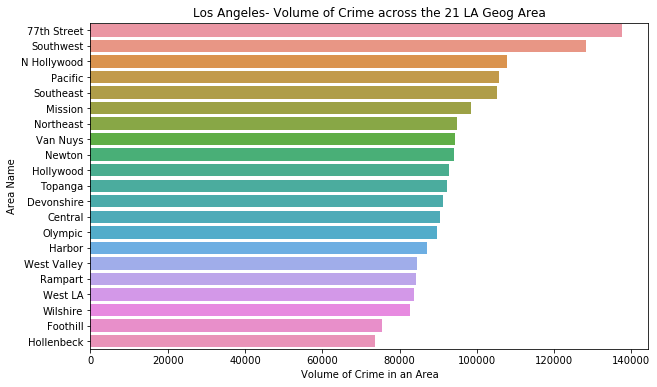

In [44]:
# Setting up figure
plt.figure(figsize=(10,6))

# Plotting categorial count plot for crime by area
sns.countplot(y='Area Name', data= clean_df, orient="h", 
              order=clean_df['Area Name'].value_counts().index)

# Setting x axis label and figure title
plt.xlabel('Volume of Crime in an Area')
plt.title('Los Angeles- Volume of Crime across the 21 LA Geog Area');

In [50]:
clean_df['Area Name'].value_counts()[:6]

77th Street    137513
Southwest      128111
N Hollywood    107707
Pacific        105655
Southeast      105104
Mission         98395
Name: Area Name, dtype: int64

The top 5 areas where most of the crimes in LA have occured among the 21 geographic areas is 77th Street, Southwest, North Hollywood, Pacific, and Southeast.

**Sidney's folium map goes here**

#### What are the top 3 vulnerable demographics in LA?

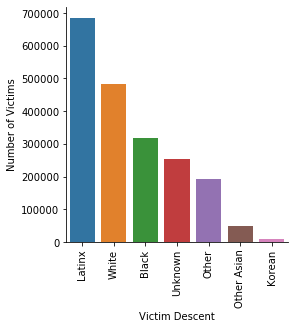

In [39]:
# Plotting  a countplot of Victim Descent
g = sns.catplot(x="Victim Descent", 
                data=clean_df, 
                kind="count",
                height=4, orient="h",
                order=clean_df['Victim Descent'].value_counts()[:7].index)

#setting x tick labels
g.set_xticklabels(['Latinx','White','Black','Unknown', 'Other', 'Other Asian','Korean'], rotation= 'vertical')

#setting y label
g.set_ylabels('Number of Victims')
g.set_titles('Distribution of victims by Descent');

In [43]:
# Proportion of victims sorted in descenting order for the 
clean_df['Victim Descent'].value_counts(normalize= True)[:10]

H    0.343869
W    0.242334
B    0.159008
X    0.127551
O    0.096124
A    0.024052
K    0.004366
F    0.001183
C    0.000443
I    0.000437
Name: Victim Descent, dtype: float64

For all the crimes reported between 2010 and June of 2019, at 34%, victims of *Latinx* descent account for the highest number of victims of crimes in that period. White victims account for 24% and Black victims account for 16% of all crime victims in that period.

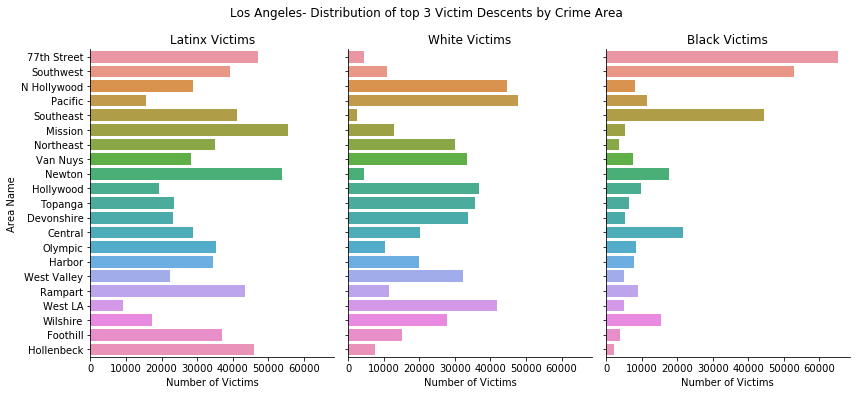

In [41]:
# Plotting a categorical estimate plot of Crime area by Descent
g = sns.catplot(y="Area Name", col="Victim Descent",
                col_order= clean_df['Victim Descent'].value_counts()[:3].index
                ,data=clean_df, kind="count",height=5, aspect=.8,
               order=clean_df['Area Name'].value_counts().index)

# Setting label an title for first facet
g.axes[0,0].set_xlabel('Number of Victims')
g.axes[0,0].set_title('Latinx Victims')

# Setting label an title for second facet
g.axes[0,1].set_xlabel('Number of Victims')
g.axes[0,1].set_title('White Victims')

# Setting label an title for third facet
g.axes[0,2].set_xlabel('Number of Victims')
g.axes[0,2].set_title('Black Victims')

#setting figure title for facetgrid plot
g.fig.suptitle('Los Angeles- Distribution of top 3 Victim Descents by Crime Area ', y = 1.05);

Looking at the top 3 vulnerable demographics in LA, Black and Latinx communities has most suffered in the highest crime occuring areas of 77th Street and Southeast. This could also be that there are lesser White people living in these two areas. White victims are highest in the North Hollywood, Pacific areas. Again, this could be because these areas have higher white population. Similarly, areas such as Mission, Newton, Rampart, Foothill and Hollenbeck have a higher number of Latinx victims than the other descents.

#### What year had the highest crime rate? 
To explore data on this query we must first convert the data to where the columns hold annual data and the rows hold monthly data

In [51]:
# Grouping data by date in index
crime_volume = pd.DataFrame(clean_df.groupby(clean_df.index.date).size(), 
                            columns=['crime_count']).reset_index()

# pulling out date from index to convert to datetime object
crime_volume.rename(columns = {'index':'Date'}, inplace = True)

#preview data
crime_volume.head(2)

,Date,crime_count
0,2010-01-01,2222
1,2010-01-02,533


In [52]:
# Data info 
crime_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3460 entries, 0 to 3459
Data columns (total 2 columns):
Date           3460 non-null object
crime_count    3460 non-null int64
dtypes: int64(1), object(1)
memory usage: 54.2+ KB


In [53]:
# Converting Date column to datetime object
crime_volume['Date']= pd.to_datetime(crime_volume['Date'], format='%Y-%m-%d')

#setting datetime object as index
crime_volume.set_index('Date', inplace=True)

# preview data
crime_volume.head(2)

,crime_count
Date,
2010-01-01,2222
2010-01-02,533


In [55]:
# Resample monthly average crime from datetime index
monthly_crime=round(crime_volume.resample('MS').mean(),2)

#preview data
monthly_crime.head()

,crime_count
Date,
2010-01-01,624.94
2010-02-01,571.39
2010-03-01,584.10
2010-04-01,591.60
2010-05-01,570.94


In [56]:
# Grouping data annually
year_groups= monthly_crime.groupby(pd.Grouper(freq='A'))

# Create a new DataFrame and store yearly values in columns 
annual_crime = pd.DataFrame()

#looping throup the year_unemp groupby object as a tuple
for date,group in year_groups:
    year = date.year          #pulling the year from datetime object
    if year == 2019:          # removing year for incomplete data
        break
    series = group.values.ravel()  # flattening the array
    annual_crime[year] = series
    
annual_crime.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,624.94,580.23,572.84,536.65,517.71,586.77,609.06,625.58,617.13
1,571.39,523.61,528.17,501.32,487.89,570.75,596.00,609.18,608.00
2,584.10,545.87,534.29,521.84,502.45,579.45,587.87,623.74,610.16
3,591.60,547.33,542.53,523.30,513.47,563.47,619.00,622.77,634.20
4,570.94,545.90,563.48,534.61,538.55,577.10,612.97,624.71,639.42


**Now we investigate the query of highest crime rate for each year in data with a boxplot**

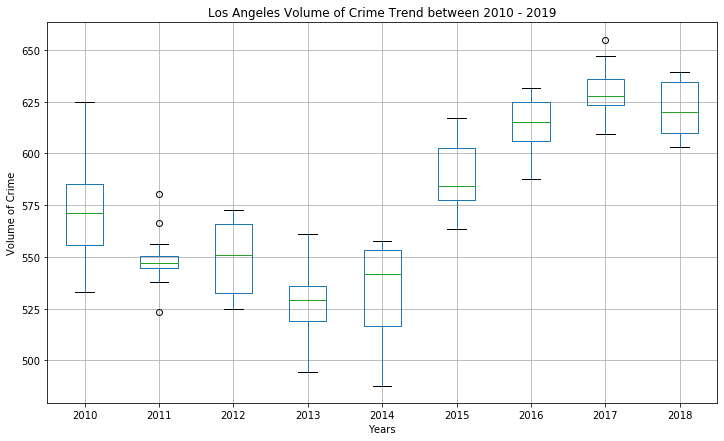

In [57]:
# Generate a box and whiskers plot for last 10 years
annual_crime.boxplot(figsize=(12,7))

#Setting figure title
plt.title('Los Angeles Volume of Crime Trend between 2010 - 2019')

#Setting x and y label
plt.xlabel('Years')
plt.ylabel('Volume of Crime')

plt.show();

From the plot we can see that 2017 saw the highest average number of crimes reported, while 2013 saw the lowest average number of crime reported in LA. 

In [59]:
# monthly_crime = pd.read_pickle('data/pickled/monthly_crime.pkl')

## Data Analysis